# Data Science Process using CRISP-DM

CRISP-DM merupakan salah satu proses yang sangat umum digunakan dalam data science. CRISP-DM, atau kepanjangan dari *Cross Industry Standard Process for Data Mining*, dalam data science, digunakan sebagai framework untuk memulai sebuah proyek data science sampai menemukan solusi yang dikehendaki. Ujung dari sebuah proyek data science terdiri dari 2 tujuan:
* untuk manusia → berupa laporan, presentasi, *insights*, dan sejenisnya
* untuk komputer → *deployment*, perangkat lunak, dan sejenisnya.

Secara umum, terdapat 8 tahapan dalam CRISP-DM:
1. *Business understanding*
2. *Data understanding*
3. *Data preparation*
4. *Modeling*
5. *Deployment*

Kita akan menggunakan data *[Customer Personality Analysis](https://www.kaggle.com/imakash3011/customer-personality-analysis)* untuk mempraktikkan CRISP-DM. Silakan unduh data melalui link tersebut dan simpan di dalam folder `data/marketing_campaign.csv`.

## A Look At The Data

Terkadang kita punya data yang akan kita pakai untuk mendefinisikan masalah yang akan kita selesaikan, itulah kenapa banyak perusahaan yang ingin menyimpan "terlebih dahulu" semua data yang berkaitan dengan perusahaan untuk kemudian dianalisis di lain waktu. Itu yang akan kita lakukan sekarang dan untuk memulai, kita impor beberapa library yang akan kita butuhkan.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("fivethirtyeight")

/Users/bitlabsinstructor/.pyenv/versions/3.8.11/envs/bitlabs-webinar/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Kemudian, kita muat data `data/marketing_campaign.csv` menggunakan pemisah "tab" (`\t`).

In [2]:
df = pd.read_csv("data/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### 1. Berapa jumlah baris dan kolom pada data?

Umumnya, setiap kali kita melakukan analisis data, kita tertarik untuk mencari tahu jumlah baris dan kolom pada data.

In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print("# of rows:", num_rows)
print("# of columns:", num_cols)

# of rows: 2240
# of columns: 29


### 2. *Data dictionary*

Setelah kita tahu jumlah kolom pada data, kita juga tertarik apa representasi dari masing-masing kolomnya, yang disebut dengan **data dictionary**. Untuk hal ini, biasanya seseorang dari tim bisnis, data engineer, data scientist, atau siapapun yang dulu menyimpan data tersebut, paham apa representasi dari tiap kolom. Pada kasus kita kali ini, berikut adalah *data dictionary* kita.


#### People

| Column Name | Representation |
| :---------- | :------------- |
| `ID` | Customer's unique identifier |
| `Year_Birth` | Customer's birth year |
| `Education` | Customer's education level |
| `Marital_Status` | Customer's marital status |
| `Income` | Customer's yearly household income |
| `Kidhome` | Number of children in customer's household |
| `Teenhome` | Number of teenagers in customer's household |
| `Dt_Customer` | Date of customer's enrollment with the company |
| `Recency` | Number of days since customer's last purchase |
| `Complain` | 1 if customer complained in the last 2 years, 0 otherwise |


#### Products

| Column Name | Representation |
| :---------- | :------------- |
| `MntWines` | Amount spent on wine in last 2 years |
| `MntFruits` | Amount spent on fruits in last 2 years |
| `MntMeatProducts` | Amount spent on meat in last 2 years |
| `MntFishProducts` | Amount spent on fish in last 2 years |
| `MntSweetProducts` | Amount spent on sweets in last 2 years |
| `MntGoldProds` | Amount spent on gold in last 2 years |


#### Promotion

| Column Name | Representation |
| :---------- | :------------- |
| `NumDealsPurchases` | Number of purchases made with a discount |
| `AcceptedCmp1` | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| `AcceptedCmp2` | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| `AcceptedCmp3` | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| `AcceptedCmp4` | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| `AcceptedCmp5` | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| `Response` | 1 if customer accepted the offer in the last campaign, 0 otherwise |


#### Place

| Column Name | Representation |
| :---------- | :------------- |
| `NumWebPurchases` | Number of purchases made through the company’s web site |
| `NumCatalogPurchases` | Number of purchases made using a catalogue |
| `NumStorePurchases` | Number of purchases made directly in stores |
| `NumWebVisitsMonth` | Number of visits to company’s web site in the last month |


### 3. *Missing values*

Untuk setiap data yang akan kita analisis, nyatanya, akan sering mengandung beberapa nilai kosong atau yang disebut dengan *missing value*. Ada banyak hal yang menyebabkan adanya nilai kosong, seperti kesalahan pada sistem saat proses koleksi data atau responden yang tidak ingin mengisi kolom tersebut pada suatu survei. Oleh karena itu, kita perlu tahu keadaan ekstrim kolom, yaitu kolom mana saja yang tidak memiliki nilai kosong dan mana saja yang hampir semua nilainya kosong.

Kita bisa menggunakan metode `isna` pada objek DataFrame.

```python
df.isna()
```

In [4]:
cols_no_na = df.columns[df.isna().sum(axis=0) == 0]
cols_with_na = df.columns[df.isna().sum(axis=0) > 0]

print("Columns with no missing value:", cols_no_na)
print("Columns with missing values:", cols_with_na)

Columns with no missing value: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
Columns with missing values: Index(['Income'], dtype='object')


```{admonition} Eksplorasi
Coba hitung persentase *missing value* dari tiap kolom!
```

In [5]:
# KETIK DI SINI


Selain kita tinjau tiap kolom, kita mungkin juga perlu melihat *missing value* untuk tiap baris data, apakah ada baris yang lebih dari 50% atributnya merupakan nilai kosong. Berbeda dengan kolom, untuk meninjau baris, kita gunakan `axis=1`.

```python
df.isna().sum(axis=1)
```

In [6]:
df[df.isna().sum(axis=1) > 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


```{tip}
Pandas menyediakan metode `DataFrame.info()` yang akan menampilkan informasi terkait tipe data pada setiap kolom dan jumlah *non-missing values*.
```

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 4. `Dtype` Tiap Kolom

Jika kita lihat hasil dari metode `info` dan dicocokkan dengan *data dictionary*, kolom `Dt_Customer` sepertinya merepresentasikan sebuah tanggal tapi tipe datanya masih `object`. Oleh karena itu, kita perlu mengubah tipe data `Dt_Customer` menjadi `datetime`.

```{note}
Pandas memiliki fitur yang akan sangat membantu kita untuk berinteraksi dengan data `datetime`. Oleh karena itu, sangat dianjurkan semua tipe data yang mewakili data tanggal/waktu diubah menjadi `datetime`.
```

````{panels}
:column: col-sm


**Convert to datetime with `astype`**
^^^
`astype` dapat digunakan pada `Series` ataupun `DataFrame`.

```python
Series.astype("datetime64[ns, UTC]")
```
---

**Convert to datetime with `pd.to_datetime`**
^^^
Menggunakan fungsi bawaan pandas:

```python
pandas.to_datetime(Series)
```
````

In [8]:
df.Dt_Customer = df.Dt_Customer.astype("datetime64")

### 5. Visualisasi Sederhana

Saatnya sekarang kita membuat visualisasi awal yang sederhana untuk mencari tahu karakter dari masing-masing kolom. Jenis visualisasi yang akan kita buat biasanya berupa *univariate* ataupun *multivariate* (mungkin maksimal 3-4 variabel).

```{admonition} Bar Plot
:class: warning
Bagaimana distribusi status kawin dari setiap customer?
```

In [9]:
outlier_year = df.Year_Birth < 1940
outlier_income = df.Income > 200000

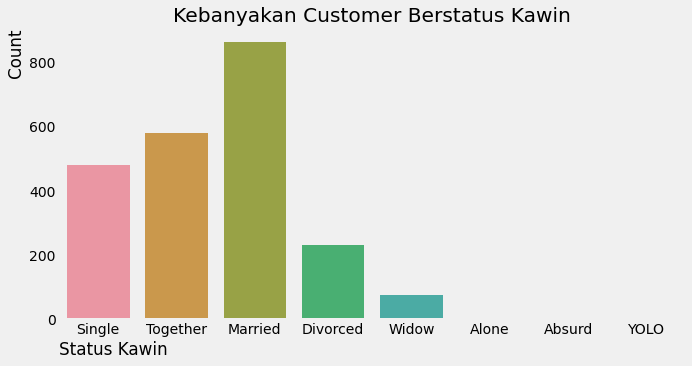

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Marital_Status", data=df)
plt.title("Kebanyakan Customer Berstatus Kawin")
plt.xlabel("Status Kawin", loc="left")
plt.ylabel("Count", loc="top")
plt.grid(False)
plt.show()

```{admonition} Scatter Plot
:class: warning
Bagaimana hubungan antara umur dan gaji?
```

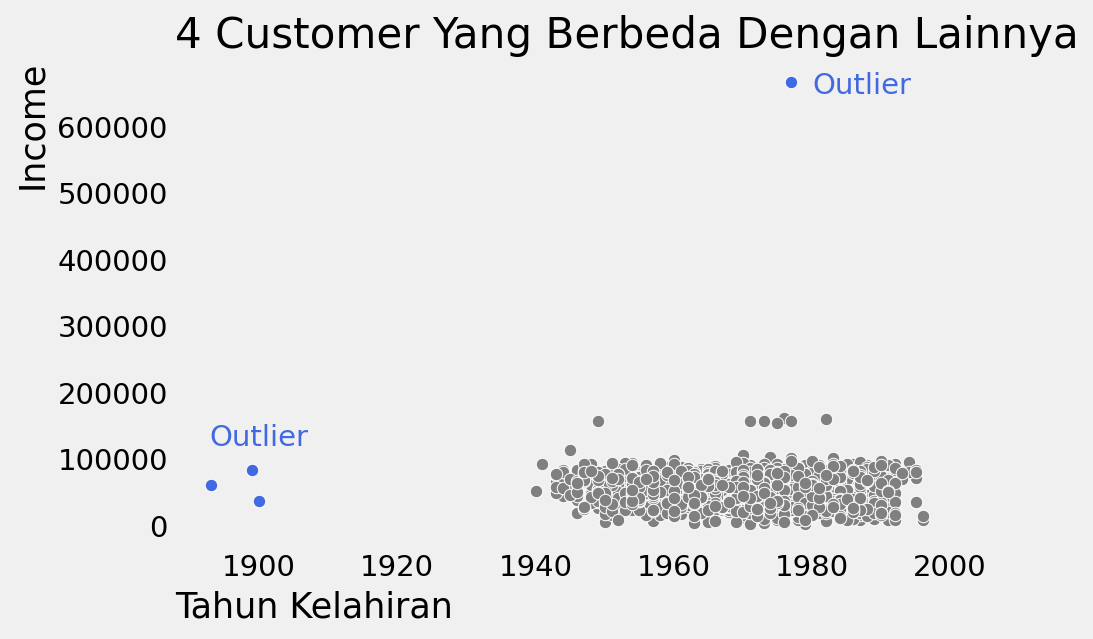

In [11]:
plt.figure(dpi=150)
sns.scatterplot(x="Year_Birth", y="Income", data=df[~outlier_year & ~outlier_income], color="gray")
sns.scatterplot(x="Year_Birth", y="Income", data=df[outlier_year | outlier_income], color="royalblue")
plt.xlabel("Tahun Kelahiran", loc="left")
plt.ylabel("Income", loc="top")
plt.title(f"4 Customer Yang Berbeda Dengan Lainnya", loc="left")
plt.text(1980, 650000, "Outlier", color="royalblue")
plt.text(1900, 120000, "Outlier", color="royalblue", horizontalalignment="center")
plt.grid(False)
plt.show()

Dari gambar di atas, terlihat ada setidaknya **4 customer** yang berbeda dengan yang lain. Dalam visualisasi, *outlier* ini memaksa skala dalam grafik untuk menampung semua titik, sehingga kita kurang bisa melihat kebanyakan data. Oleh karena itu, kita bisa buat visualisasi tanpa keempat *outlier*.

In [12]:
avg_year = df.Year_Birth.mean().round()
avg_income = df.Income.mean().round(2)

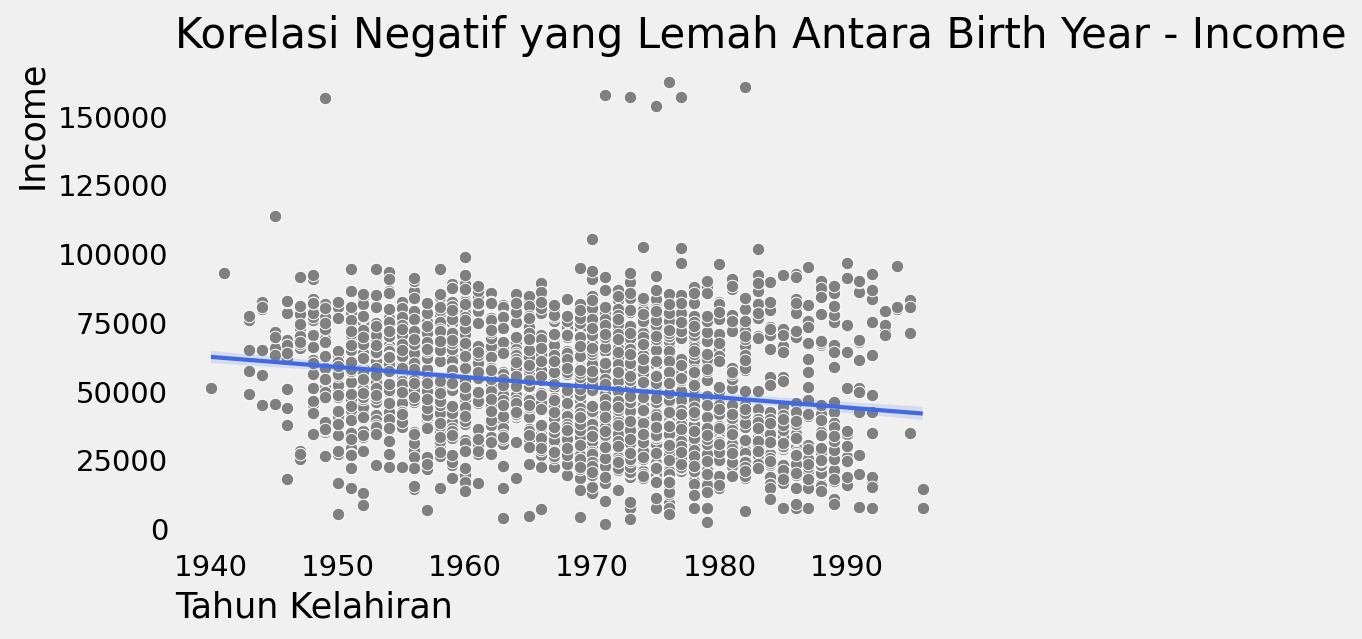

In [13]:
plt.figure(dpi=150)
sns.scatterplot(x="Year_Birth", y="Income", data=df[~outlier_income & ~outlier_year], color="gray")
sns.regplot(x="Year_Birth", y="Income", data=df[~outlier_income & ~outlier_year], scatter=False, line_kws=dict(linewidth=2), color="royalblue")
plt.xlabel("Tahun Kelahiran", loc="left")
plt.ylabel("Income", loc="top")
plt.title("Korelasi Negatif yang Lemah Antara Birth Year - Income", loc="left")
plt.grid(False)
plt.show()

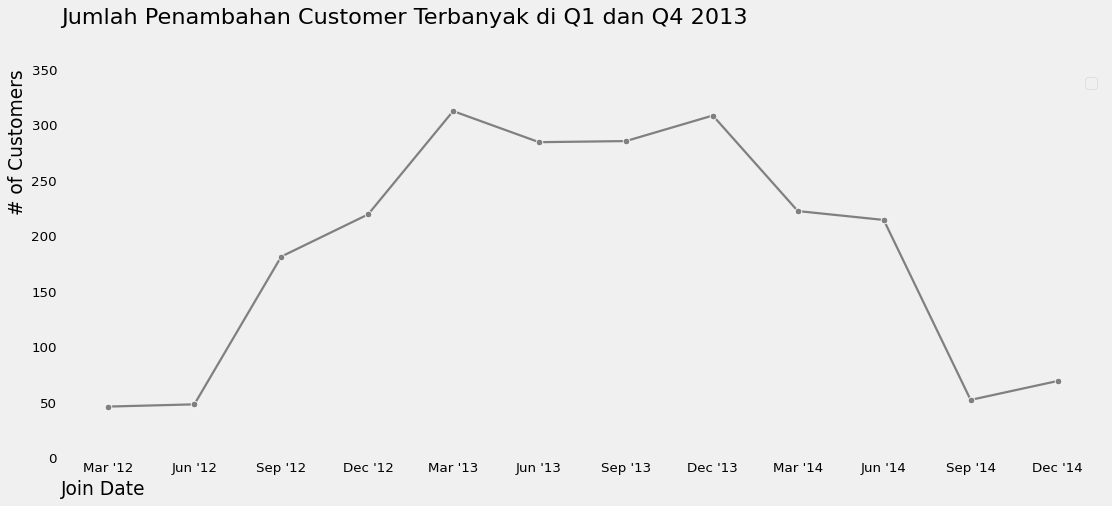

In [14]:
customer_by_date = df.set_index("Dt_Customer").resample("D")
customer_by_month = df.set_index("Dt_Customer").resample("M")
customer_by_year = df.set_index("Dt_Customer").resample("Y")
customer_by_quarter = df.set_index("Dt_Customer").resample("Q")

plt.figure(figsize=(15, 6), dpi=80)
ax = sns.lineplot(
    x=customer_by_quarter.count().index.date,
    y="ID",
    data=customer_by_quarter.count(),
    marker="o",
    color="gray",
    size=14
)
plt.xticks(
#     range(len(customer_by_quarter.groups)),
    customer_by_quarter.count().index.date,
    [d.month_name()[:3] + " '" + str(d.year)[-2:] for d in customer_by_quarter.groups],
    fontsize=12
)
plt.yticks(ax.get_yticks(), fontsize=12)
plt.legend([])
plt.xlabel("Join Date", loc="left")
plt.ylabel("# of Customers", loc="top")
plt.title("Jumlah Penambahan Customer Terbanyak di Q1 dan Q4 2013", loc="left", y=1.1)
plt.grid(False)
plt.show()

```{admonition} Apa Saja Yang Perlu Kita Cek
:class: tip
✅ Cari tahu jumlah baris dan kolom pada data

✅ Cari tahu apakah ada *missing value* pada masing-masing baris dan/atau kolom

✅ Cek apakah kolom merepresentasikan tipe data yang seharusnya (contoh: *numeric* yang dianggap *string*)

✅ Buat visualisasi eksplorasi seperti barplot, boxplot, scatterplot, dan lainnya
```


## Business Questions

Setelah kita melihat-lihat data yang kita gunakan, sekarang saatnya untuk memformulasikan masalah yang ingin diselesaikan atau informasi apa yang kita gali dari data.

````{note}
Terkadang kita memulai dengan keadaan sudah memiliki data, sehingga kita perlu mencari tahu informasi apa yang ingin digali. Tapi, bisa juga kita sudah mempunyai masalah bisnis yang ingin kita pecahkan atau cari tahu, tapi kita belum menemukan data yang cocok seperti apa.

```{figure} ./assets/images/data-question-solution.png
:alt: Data - Question - Solution
:name: data-question-solution
:width: 50%
Data - Question - Solution
```

```{figure} ./assets/images/question-data-solution.png
:alt: Question - Data - Solution
:name: question-data-solution
:width: 50%
Question - Data - Solution
```
````

Setelah melihat secara singkat dan membuat visualisasi data, kamu bisa membuat beberapa pertanyaan bisnis yang menurut kamu menarik untuk dicari. Sebagai contoh, berikut beberapa pertanyaan bisnis yang bisa kita eksplor sama-sama:

1. Bagaimana `Education` berhubungan dengan `Income` yang mungkin juga berhubungan dengan **jumlah total pembelian**?
2. *Customer* seperti apakah yang sering membeli produk melalui Web, Toko, serta Katalog produk?


## Data Understanding

Dari ketiga *business problem* tersebut, kita terjemahkan ke dalam data bagaimana **asumsi dan langkah awal** untuk menjawab pertanyaan tersebut. Mungkin kita akan memerlukan *modeling* menggunakan *machine learning*, tapi setidaknya kita harus mencoba menjawab pertanyaan tersebut menggunakan data yang tersedia dulu.


### 1. Hubungan `Education` dengan `Income` dengan Jumlah Total Pembelian

Pertama, kita harus membuat kolom baru yang menjumlahkan semua pembelian, misal kita namai `NumTotalPurchases`.

In [15]:
df["NumTotalPurchases"] = df["NumCatalogPurchases"] + df["NumDealsPurchases"] + df["NumWebPurchases"]

Jika kita lihat bagaimana hubungan antara `Income` dengan `NumTotalPurchases` di bawah ini, sekilas memang terdapat relasi positif diantara keduanya. Tapi, mari kita coba lihat lebih jauh lagi.

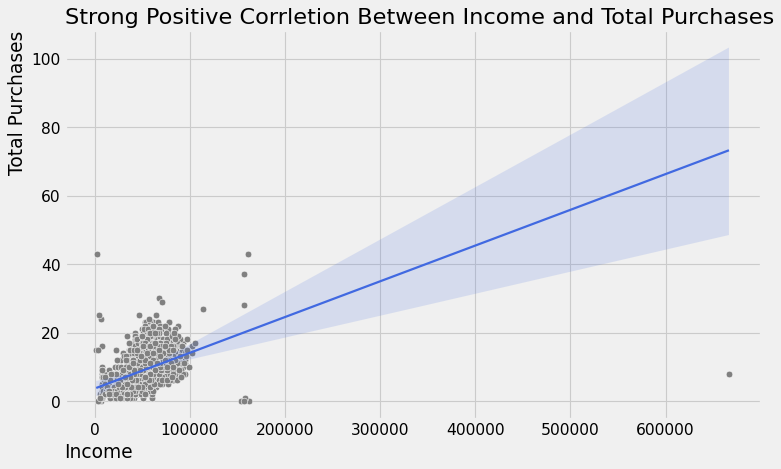

In [16]:
plt.figure(figsize=(10, 6), dpi=80)
sns.scatterplot(x="Income", y="NumTotalPurchases", data=df, color="gray")
sns.regplot(
    x="Income", y="NumTotalPurchases", data=df, scatter=False, line_kws=dict(linewidth=2), color="royalblue"
)
plt.xlabel("Income", loc="left")
plt.ylabel("Total Purchases", loc="top")
plt.title("Strong Positive Corrletion Between Income and Total Purchases", loc="left")
plt.show()

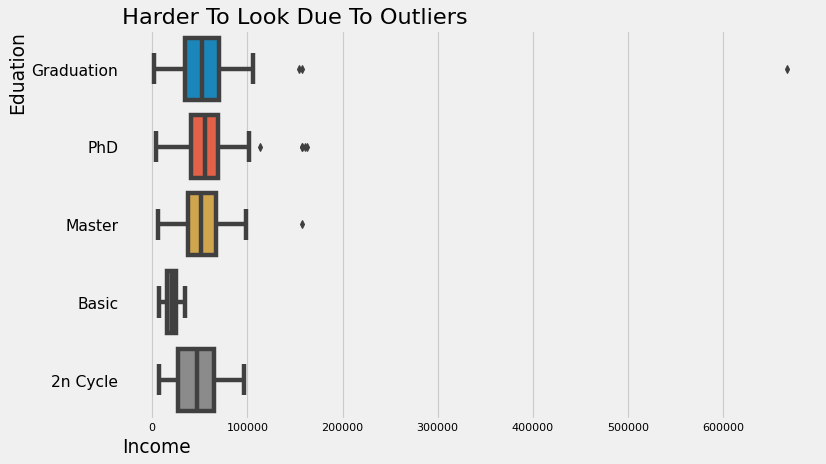

In [17]:
plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(
    x="Income",
    y="Education",
    data=df
)
plt.xlabel("Income", loc="left")
plt.xticks(size=10)
plt.ylabel("Eduation", loc="top")
plt.title("Harder To Look Due To Outliers", loc="left")
plt.show()

Dari gambar di atas, kita terasa sulit untuk melihat secara teliti bagaimana sebaran `Income` pada masing-masing jenis `Education` karena beberapa outliers. Oleh karena itu, untuk melihat lebih dalam lagi, kita perlu menghilangkan outlier tersebut untuk "sementara". Kita bisa gunakan kode di bawah untuk menghilangkan beberapa outliers pada `Income`.

```python
df_no_outliers = df[df.Income < df.Income.quantile(.75) + 1.5*(df.Income.quantile(.75) - df.Income.quantile(.25))]

plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(
    x="Income",
    y="Education",
    data=df_no_outliers
)
plt.xlabel("Income", loc="left")
plt.xticks(size=10)
plt.ylabel("Eduation", loc="top")
plt.title("")
plt.show()
```

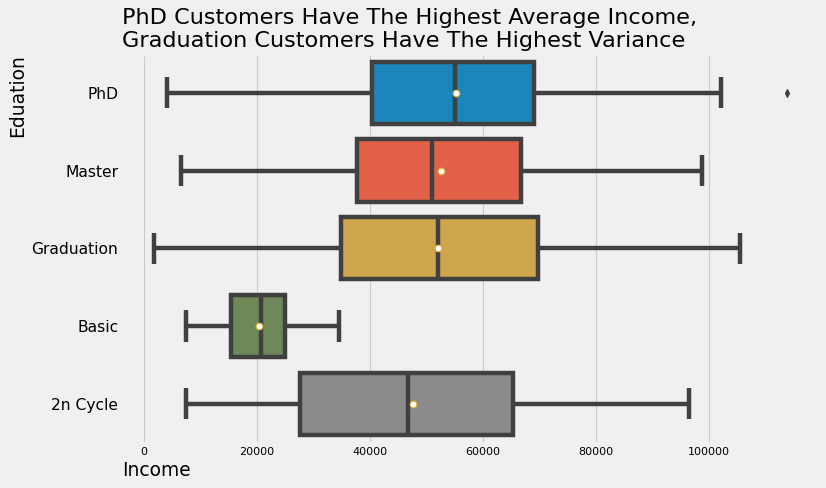

In [18]:
df_no_outliers = df[
    df.Income < df.Income.quantile(.75) + 1.5*(df.Income.quantile(.75) - df.Income.quantile(.25))
]

plt.figure(figsize=(10, 6), dpi=80)
sns.boxplot(
    x="Income",
    y="Education",
    data=df_no_outliers,
    showmeans=True, meanprops={"markerfacecolor": "white", "marker": "o"},
    order=["PhD", "Master", "Graduation", "Basic", "2n Cycle"]
)
plt.xlabel("Income", loc="left")
plt.xticks(size=10)
plt.ylabel("Eduation", loc="top")
plt.title(
    "PhD Customers Have The Highest Average Income, \nGraduation Customers Have The Highest Variance",
    loc="left"
)
plt.show()

Dari gambar di atas, terlihat bahwa customer dengan latar belakang edukasi PhD memiliki rata-rata pendapatan yang paling tinggi dibanding lainnya, sedangkan pendapatan dengan latar belakang edukasi *Graduation* paling bervariasi dari pada yang lain. Sedangkan, *Basic* memiliki rata-rata dan variansi pendapatan yang paling rendah.

Selanjutnya, kita coba lihat bagaimana hubungan antara pendapatan pada masing-masing edukasi terhadap jumlah total pembelian.

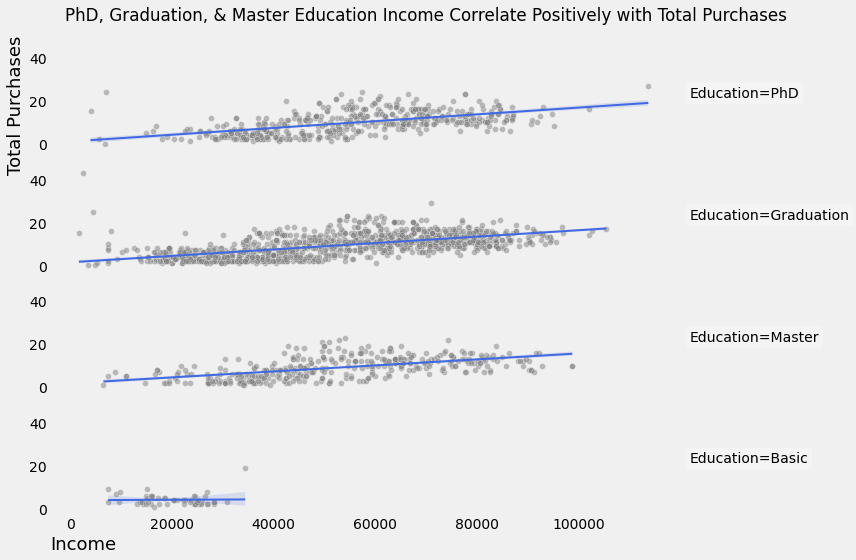

In [19]:
fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex=True, sharey=True)
for axis, edu in zip(ax, ["PhD", "Graduation", "Master", "Basic"]):
    sns.scatterplot(
        x="Income",
        y="NumTotalPurchases",
        data=df_no_outliers[df_no_outliers.Education == edu],
        ax=axis,
        alpha=.5,
        color="gray"
    )
    sns.regplot(
        x="Income",
        y="NumTotalPurchases",
        data=df_no_outliers[df_no_outliers.Education == edu],
        ax=axis,
        scatter=False,
        line_kws=dict(linewidth=2), color="royalblue"
    )
    axis.annotate(
        "Education="+ edu,
        xycoords="axes fraction",
        xy=(1.02, .5),
        bbox={"boxstyle": "round", "fc": "w", "alpha": .3}
    )
    axis.set_ylabel("")
    axis.grid(False)
fig.text(.02, .9, "Total Purchases", rotation="vertical", va="top", fontsize=18)
plt.xlabel("Income", loc="left", fontsize=18)
plt.suptitle(
    "PhD, Graduation, & Master Education Income Correlate Positively with Total Purchases",
    x=0.1, y=.95, ha="left"
)
plt.show()

Berdasarkan visualisasi data di atas, pendapatan customer dengan latar belakang edukasi *PhD*, *Graduation*, *Master* memiliki korelasi positif terhadap jumlah pembelian yang dilakukan, meskipun tidak sebegitu kuat dibanding pendapatan secara keseluruhan.

### 2. Customer Yang Membeli Melalui Web, Toko, dan Katalog

Sekarang, kita ingin mengetahui bagaimana karakter customer yang pernah membeli produk kita melalui web, toko, dan katalog produk yang sudah disediakan. Kita akan coba bandingkan karakter pembeli pada tiap *channel*.

In [20]:
cust_no_purchases = df[df["NumTotalPurchases"] == 0]
cust_purchases = df[df["NumTotalPurchases"] > 0]

print("# of customers that don't purchase:", len(cust_no_purchases))
print("# of customers that purchase:", len(cust_purchases))

# of customers that don't purchase: 7
# of customers that purchase: 2233


Ternyata hanya ada **7 customer ($0.3\%$)** yang tidak pernah membeli produk kita. Pertama, mari kita lihat statistik pembelian pada masing-masing *channel* menggunakan `.describe` dan *box plot*.

In [21]:
channel_cols = ["NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases"]
cust_purchases[channel_cols].describe()

,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
count,2233.000000,2233.000000,2233.000000
mean,4.097627,5.806986,2.670399
std,2.773621,3.242016,2.923871
min,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000
50%,4.000000,5.000000,2.000000
75%,6.000000,8.000000,4.000000
max,27.000000,13.000000,28.000000


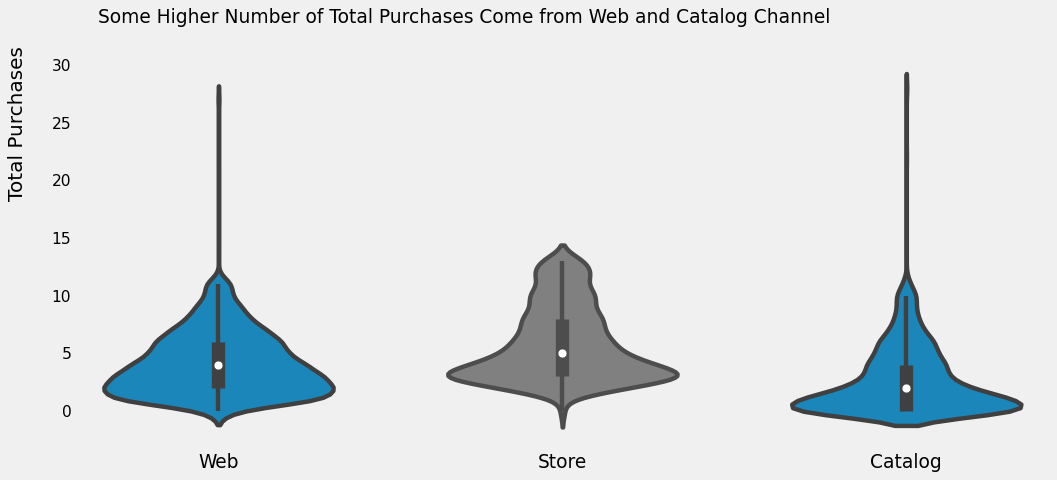

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6), dpi=80, sharey=True)
for channel, ax_channel  in zip(channel_cols, ax):
    if channel in ["NumWebPurchases", "NumCatalogPurchases"]:
        sns.violinplot(y=channel, data=cust_purchases, ax=ax_channel, showmeans=True)
    else:
        sns.violinplot(y=channel, data=cust_purchases, ax=ax_channel, color="gray", showmeans=True)
    ax_channel.set_ylabel("")
    ax_channel.grid(False)
ax[0].set_xlabel("Web")
ax[1].set_xlabel("Store")
ax[2].set_xlabel("Catalog")
fig.text(.02, .9, "Total Purchases", rotation="vertical", va="top", fontsize=18)
plt.suptitle(
    "Some Higher Number of Total Purchases Come from Web and Catalog Channel",
    x=.1, ha="left"
)
plt.show()

Terlihat rata-rata pembelian paling banyak terjadi melalui *store*. Beberapa pembelian melalui *web* dan *catalog* sepertinya terdapat outlier, di mana ada cusotmer yang membeli produk dengan kuantitas yang jaun di atas lainnya. Kita akan lihat bagaimana karakter customer pada outlier tersebut.

```{note}
Kita akan gunakan **_IQR rule_** untuk menentukan outliers:

$$
\text{upper bound} = Q_1 - 1.5\cdot\text{IQR} \\
\text{lower bound} = Q_1 - 1.5\cdot\text{IQR}
$$
```

Menggunakan pandas:

```python
upper_bound_web = cust_purchases.NumWebPurchases.quantile(.75) + 1.5*(cust_purchases.NumWebPurchases.quantile(.75) - cust_purchases.NumWebPurchases.quantile(.25))
upper_bound_catalog = cust_purchases.NumCatalogPurchases.quantile(.75) + 1.5*(cust_purchases.NumCatalogPurchases.quantile(.75) - cust_purchases.NumCatalogPurchases.quantile(.25))
```

Kemudian, kita bisa gunakan `upper_bound_web` dan `upper_bound_catalog` untuk masing-masing kolom.

In [23]:
# calculate upper bound for web and catalog purchases
upper_bound_web = cust_purchases.NumWebPurchases.quantile(.75) \
                    + 1.5*(cust_purchases.NumWebPurchases.quantile(.75) - cust_purchases.NumWebPurchases.quantile(.25))
upper_bound_catalog = cust_purchases.NumCatalogPurchases.quantile(.75) \
                        + 1.5*(cust_purchases.NumCatalogPurchases.quantile(.75) - cust_purchases.NumCatalogPurchases.quantile(.25))

In [24]:
web_purchases_outliers = cust_purchases[cust_purchases.NumWebPurchases > upper_bound_web]
catalog_purchases_outliers = cust_purchases[cust_purchases.NumCatalogPurchases > upper_bound_catalog]

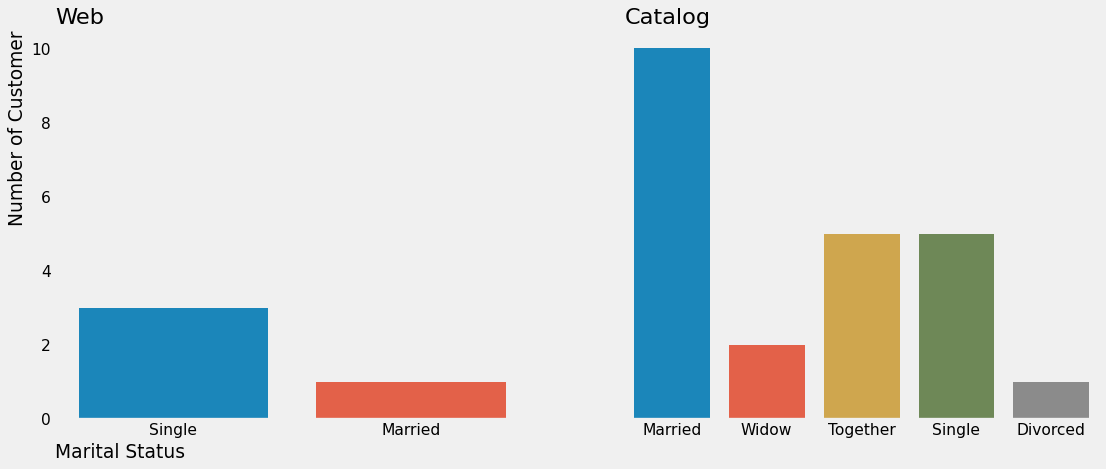

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), dpi=80, sharey=True, )
sns.countplot(x="Marital_Status", data=web_purchases_outliers, ax=ax[0])
ax[0].set_xlabel("Marital Status", loc="left")
ax[0].set_ylabel("Number of Customer", loc="top")
ax[0].set_title("Web", loc="left")
ax[0].grid(False)
sns.countplot(x="Marital_Status", data=catalog_purchases_outliers, ax=ax[1])
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].set_title("Catalog", loc="left")
ax[1].grid(False)
plt.show()

Dari gambar di atas, kita bisa lihat ternyata banyak customer *single* yang membeli produk melalui *web* sedangkan customer *married* banyak membeli melalui katalog produk yang disediakan. Apakah pola ini juga berlaku untuk jumlah pembelian normal (diluar outliers)? Untuk mengecek, kita akan buat kolom baru yang akan membantu kita dalam membuat visualisasi dengan fungsi berikut.

```python
def user_most_used_channel(channels: pd.Series):
    channel_name = ["Web", "Catalog"]
    return channel_name[np.argmax(channels)]
```

Fungsi di atas akan menentukan channel mana yang paling banyak digunakan untuk membeli produk dibandingkan dengan channel yang lain yang mungkin pernah digunakan.

In [26]:
def user_most_used_channel(channels: pd.Series):
    channel_name = ["Web", "Store", "Catalog"]
    return channel_name[np.argmax(channels)]

In [27]:
cust_purchases["Channel"] = cust_purchases[channel_cols].apply(user_most_used_channel, axis=1).copy()

/var/folders/gn/lh5142px2tb1x8mbqzsf3ckh0000gn/T/ipykernel_12898/3245954703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_purchases["Channel"] = cust_purchases[channel_cols].apply(user_most_used_channel, axis=1).copy()


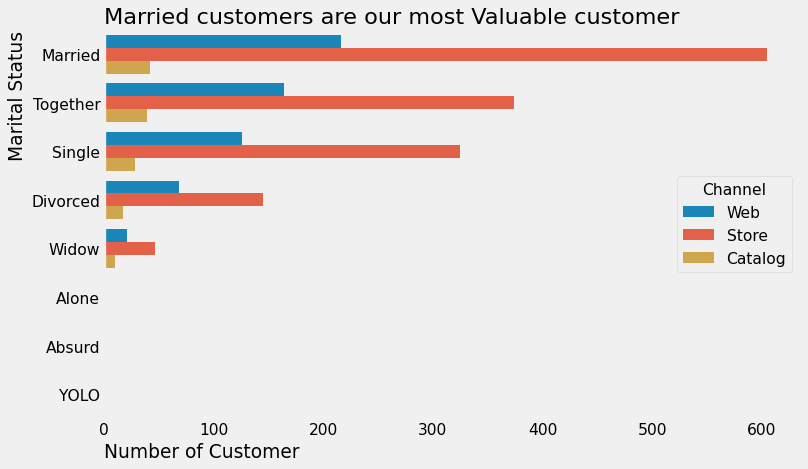

In [28]:
plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(
    y="Marital_Status", data=cust_purchases, hue="Channel",
    order=cust_purchases.Marital_Status.value_counts().index, hue_order=["Web", "Store", "Catalog"]
)
plt.grid(False)
plt.xlabel("Number of Customer", loc="left")
plt.ylabel("Marital Status", loc="top")
plt.title("Married customers are our most Valuable customer", loc="left")
plt.show()

Dari beberapa visualisasi di atas, kita bisa simpulkan bahwa:
* Secara umum, customer yang sudah menikah (*Married*) menjadi kelompok customer yang paling sering melakukan pembelian di berbagai channel yang ada.
* Ada beberapa customer yang melakukan pembelian dengan jumlah lebih dari lainnya melalui *web* dan *katalog*.
* Pada beberapa customer (outlier) tersebut, customer *single* dan *married* menjadi customer yang paling banyak jumlahnya. Hal ini **mungkin** dikarenakan customer yang sudah menikah suka membeli beberapa produk sekaligus pada katalog untuk pasangan dan/atau anak-anak mereka, sedangkan customer *single* mungkin lebih suka membeli untuk dirinya sendiri melalui web.


## Key Takeaways

Dari analisis yand sudah dilakukan, ada beberapa temuan:
* Customer berlatar belakang PhD memiliki rata-rata pendapatan paling tinggi dibandingkan dengan customer berlatar belakang lain, yang kemudian diikuti oleh Master, dan Graduation.
* Customer berlatar belakang Graduation memiliki variansi pendapatan yang cukup tinggi. Sehingga, kita perlu gali lebih jauh lagi jika kita ingin memberi penawaran khusus kepada customer ini supaya tidak salah sasaran.
* Customer PhD, Master, dan Graduation, memiliki korelasi positif antara pendapatannya dengan jumlah pembelian yang dilakukan. Ini berarti semakin tinggi gaji customer, semakin banyak pembelian yang dilakukan.
* Dari sekian banyak customer pada data, terdapat **0,3%** customer yang belum pernah melakukan pembelian.
* Rata-rata pembelian paling banyak datang melalui channel *store*
* Secara umum, customer yang sudah menikah (*Married*) menjadi kelompok customer yang paling sering melakukan pembelian di berbagai channel yang ada.
* Ada beberapa customer yang melakukan pembelian dengan jumlah lebih dari lainnya melalui *web* dan *katalog*.